# Chapter 2: Profiles and the profile space

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the data
data_path = "../data/travels.xls"
df = pd.read_excel(data_path, index_col=0)

In [3]:
# Calculate row profiles by dividing each row by its row total
row_profiles = df.div(df.sum(axis=1), axis=0)
print(row_profiles)

                Holidays  HalfDays  FullDays
Norway          0.333333  0.055556  0.611111
Canada          0.066667  0.200000  0.733333
Greece          0.137931  0.862069  0.000000
France/Germany  0.083333  0.083333  0.833333


In [4]:
# Extract data for 3D plotting
x = row_profiles['FullDays']
y = row_profiles['Holidays']
z = row_profiles['HalfDays']

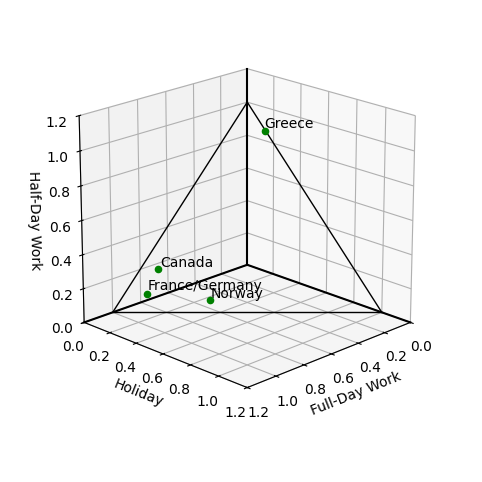

In [5]:
# Create a figure and a 3D axis
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the axes lines for the 3D plot
ax.plot([0, 1.2], [0, 0], [0, 0], color='black')  # X-axis
ax.plot([0, 0], [0, 1.2], [0, 0], color='black')  # Y-axis
ax.plot([0, 0], [0, 0], [0, 1.2], color='black')  # Z-axis

# Plot the triangle for visualization
ax.plot([0, 0], [0, 1], [1, 0], color='black', linewidth=1)
ax.plot([0, 1], [1, 0], [0, 0], color='black', linewidth=1)
ax.plot([0, 1], [0, 0], [1, 0], color='black', linewidth=1)

# Plot the points for each country
for country in row_profiles.index:
    ax.scatter(
        row_profiles.loc[country, 'FullDays'],
        row_profiles.loc[country, 'Holidays'],
        row_profiles.loc[country, 'HalfDays'],
        s=20,
        color='green',
        )
    
    # Adjust the text position dynamically to avoid overlap
    # Apply a small random jitter to the label position
    offset_x = 0.05 + np.random.uniform(-0.02, 0.02)
    offset_y = 0.05 + np.random.uniform(-0.02, 0.02)
    offset_z = 0.05 + np.random.uniform(-0.02, 0.02)

    ax.text(
        row_profiles.loc[country, 'FullDays'] + offset_x,
        row_profiles.loc[country, 'Holidays'] + offset_y,
        row_profiles.loc[country, 'HalfDays'] + offset_z,
        country,
        fontsize=10,
        )
    
# Set the viewing angle to adjust the perspective
ax.view_init(elev=20, azim=45)

# Set labels for each axis
ax.set_xlabel('Full-Day Work')
ax.set_ylabel('Holiday')
ax.set_zlabel('Half-Day Work')

# Set axis limits for better visualization
ax.set_xlim(0, 1.2)
ax.set_ylim(0, 1.2)
ax.set_zlim(0, 1.2)

# Adjust the aspect ratio of the plot
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.8, 0.8, 1, 1]))

# Set the title of the plot
# ax.set_title('Row Profiles in 3D Space')

# Show the plot
plt.show()